<a href="https://colab.research.google.com/github/Saku052/GooglePlayAnalysis/blob/main/PlayWeightAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Relationship of elements, installs and rating in a game.

In [155]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
import scipy.stats as st

### Import csv file and create data a frame which only shows game *category*

In [161]:
df = pd.read_csv("googleplaystore.csv")
df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


Convert object types

In [162]:
# Convert non float value to float
df["Reviews"] = pd.to_numeric(df["Reviews"], errors = "coerce")
df["Size"] =  pd.to_numeric(df["Size"].str.strip('M'), errors = "coerce")
df["Installs"] = df["Installs"].str.replace(',', '')
df["Installs"] =  pd.to_numeric(df["Installs"].str.strip('+'), errors = "coerce")
# clear all null values
df = df.dropna()


In [166]:
Game_df = df[df["Category"] == "GAME"]
Game_df.tail(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10793,Sid Story,GAME,4.4,28510.0,78.0,500000.0,Free,0,Teen,Card,"August 1, 2018",2.6.6,4.0.3 and up
10803,Fatal Raid - No.1 Mobile FPS,GAME,4.3,56496.0,81.0,1000000.0,Free,0,Teen,Action,"August 7, 2018",1.5.447,4.0 and up
10804,Poker Pro.Fr,GAME,4.2,5442.0,17.0,100000.0,Free,0,Teen,Card,"May 22, 2018",4.1.3,2.3 and up


#### Check the normality of reviews and decide the amount of reviews needed to take into account

analysing all the rating could mess up the analysis. this is due to lack of reliability of some ratings with low reviews.

To solve this problem


> If the number of reviews follow the normal distribution, take out the data lower than 2 standerd distribution will increase the reliability. 



> If the number of reviews does not follow the normal distribution, take out the data on the lower quatile of interquatile range. 







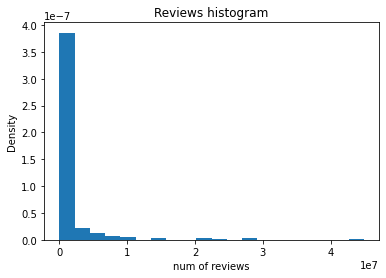

In [167]:
# Check normality by ploting a histogram for game df
plt.hist(Game_df["Reviews"], density = True, bins = 20)
plt.title("Reviews histogram")
plt.xlabel("num of reviews")
plt.ylabel("Density")
plt.show()

As majority of apps consentrate num of reviews around 0, taking out the data by interquartile range will take out majority of the data. 
Therefore, the best method here is to decide the minimum number of reviews needed myself by checking the histogram closely. 

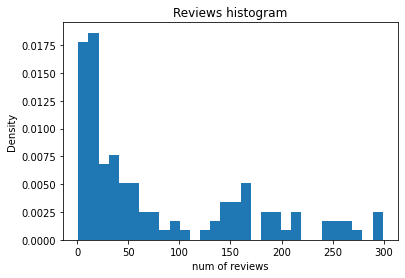

In [188]:
# dataframe with reviews less than 300
Game_closer_Se = Game_df[Game_df["Reviews"] < 300]
# plot histogram
plt.hist(Game_closer_Se["Reviews"] , density = True, bins = 30)
plt.title("Reviews histogram")
plt.xlabel("num of reviews")
plt.ylabel("Density")
plt.show()

In [192]:
GameClean1_df = Game_df[Game_df["Reviews"] > 30]
GameClean1_df.count()

App               920
Category          920
Rating            920
Reviews           920
Size              920
Installs          920
Type              920
Price             920
Content Rating    920
Genres            920
Last Updated      920
Current Ver       920
Android Ver       920
dtype: int64

From the histogram, we can see that majority of apps concentrates under 20 reviews and decreases as the number of reviews increases.

To make a fair decision, it is important that i do not rely on gut felling. However, in this case I do not know any fair formula or number which I can say that number of reviews is enough to say that the rating is fair. 

Therefore, I have devided that I will remove all data with num of reviews less than 30. 

This is because there are still fair amount of data left after I remove 30 data and that having 30 reviews are quite reliable when we analys ratings. 